In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load your Excel file
file_path = "PCF_data.xlsx"
df = pd.read_excel(file_path)

In [ ]:
df.shape

(1118, 11)

In [ ]:
print(df.head(5))

   core-ref-index-at-wl-1.55um  clad-ref-index  no-of-\nrings  diaBYpitch  \
0                        1.444               1              4         0.6   
1                        1.444               1              4         0.6   
2                        1.444               1              4         0.6   
3                        1.444               1              4         0.6   
4                        1.444               1              4         0.6   

   pitch\n(um)  wl\n(um)     neff  Aeff\n(um^2)  dispersion\n(ps/km.nm)  \
0          0.8   1.58333  1.33418       5.02490                -457.994   
1          0.8   1.41322  1.34653       2.81363                -502.289   
2          0.8   1.27612  1.35866       1.96006                -432.099   
3          0.8   1.16327  1.37008       1.55828                -314.841   
4          0.8   1.06875  1.38044       1.33372                -198.731   

   conf-loss\n(dB/cm)  conf-loss-in-log10\n(dB/cm)  
0          155.015000            

In [ ]:
# Define input and output columns
input_columns = [
    "core-ref-index-at-wl-1.55um", "no-of-\nrings", "diaBYpitch", "pitch\n(um)", "wl\n(um)"
]
output_columns = [
    "neff", "Aeff\n(um^2)", "dispersion\n(ps/km.nm)",
    "conf-loss-in-log10\n(dB/cm)"
]

In [ ]:
# Prepare input and output data
X = df[input_columns].values
y = df[output_columns].values

In [ ]:
# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)

In [ ]:
# Train SVR on all output parameters
svr = MultiOutputRegressor(SVR(C=1000, epsilon=0.0001, kernel='rbf'))
svr.fit(X_train_scaled, y_train_scaled)

MultiOutputRegressor(estimator=SVR(C=1000, epsilon=0.0001))

In [ ]:
# Predict with SVR
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

In [ ]:
# Evaluate updated model
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

In [ ]:
# Display results
results_df = pd.DataFrame({
    "Output Parameter": output_columns,
    "Updated MSE": mse,
    "Updated R² Score": r2
})

In [ ]:
print(results_df)

              Output Parameter   Updated MSE  Updated R² Score
0                         neff  8.987881e-10          0.999999
1                 Aeff\n(um^2)  3.290672e-03          0.996694
2       dispersion\n(ps/km.nm)  2.945823e+01          0.998671
3  conf-loss-in-log10\n(dB/cm)  2.170025e-01          0.994296


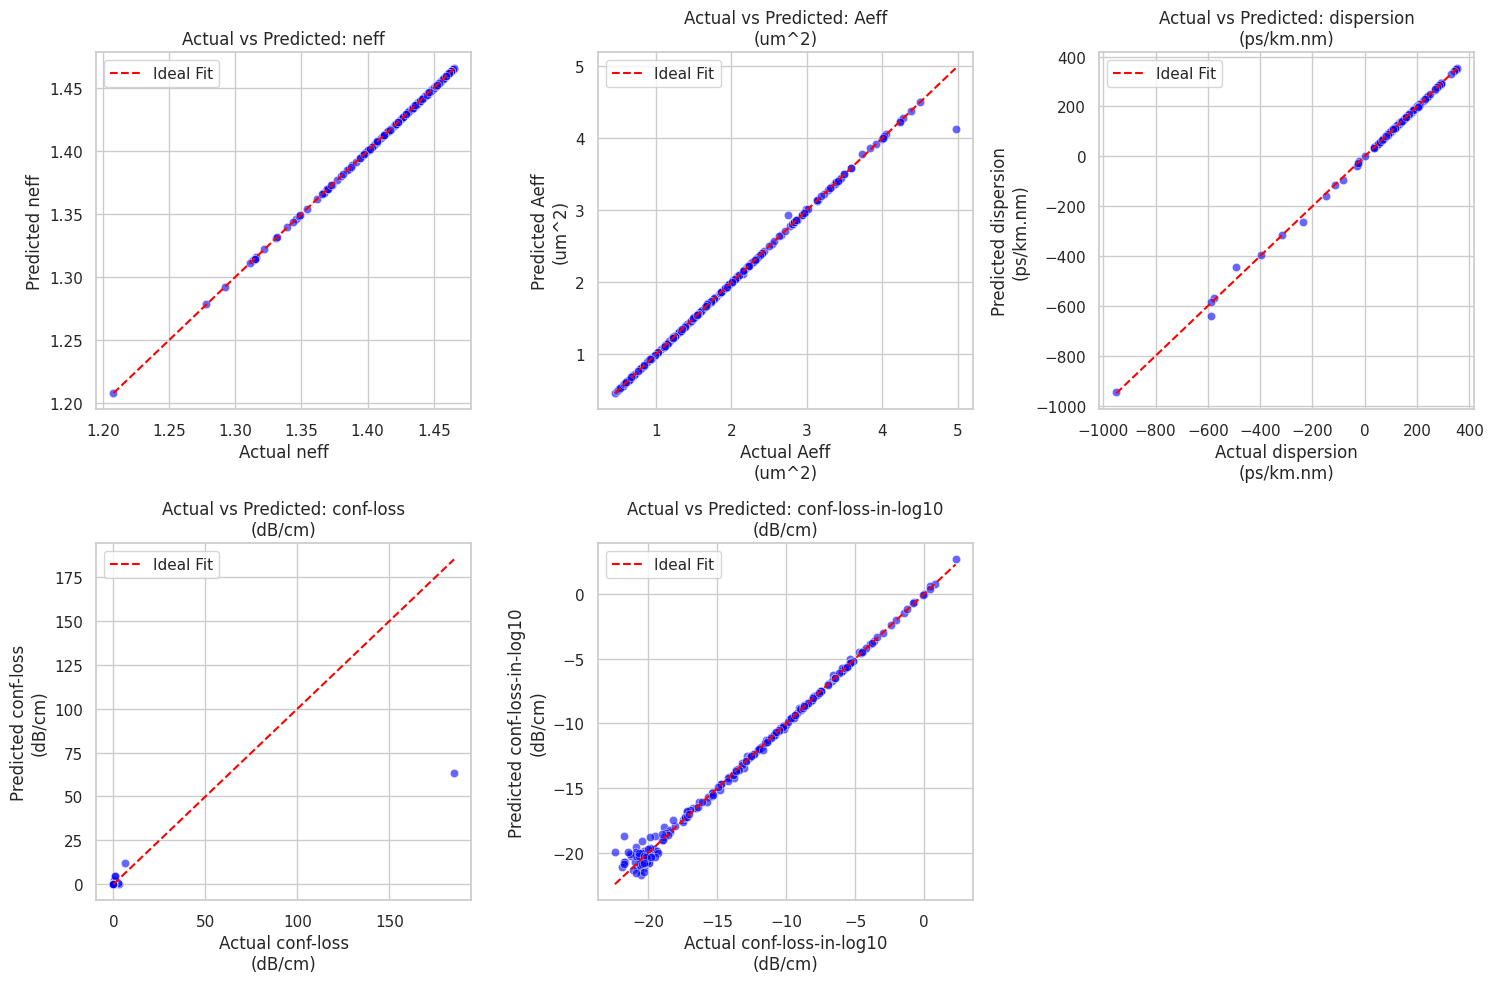

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Plot each output parameter
for i, output in enumerate(output_columns):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=y_test[:, i], y=y_pred[:, i], color="blue", alpha=0.6)
    plt.plot([min(y_test[:, i]), max(y_test[:, i])],
             [min(y_test[:, i]), max(y_test[:, i])],
             color='red', linestyle='--', label='Ideal Fit')
    plt.xlabel(f"Actual {output}")
    plt.ylabel(f"Predicted {output}")
    plt.title(f"Actual vs Predicted: {output}")
    plt.legend()

plt.tight_layout()
plt.show()

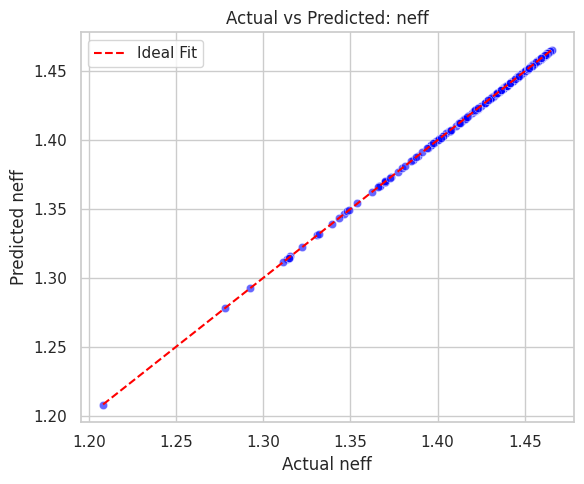

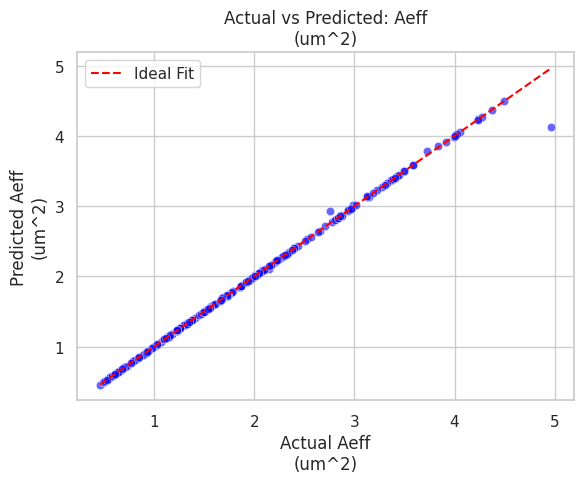

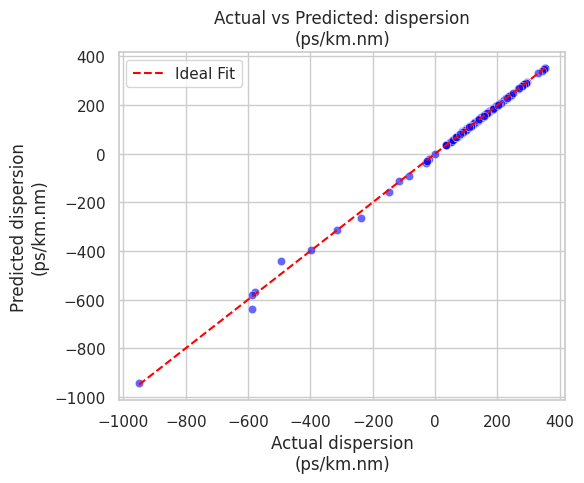

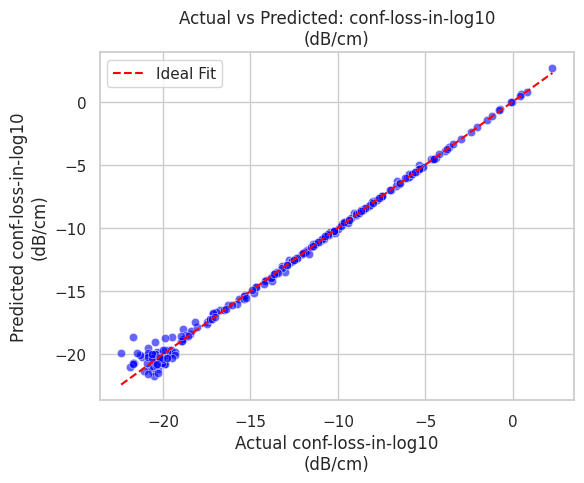

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Loop through each output parameter
for i, output in enumerate(output_columns):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_test[:, i], y=y_pred[:, i], color="blue", alpha=0.6)
    plt.plot([min(y_test[:, i]), max(y_test[:, i])],
             [min(y_test[:, i]), max(y_test[:, i])],
             color='red', linestyle='--', label='Ideal Fit')
    plt.xlabel(f"Actual {output}")
    plt.ylabel(f"Predicted {output}")
    plt.title(f"Actual vs Predicted: {output}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame to compare actual vs predicted
comparison_data = {}

# Add each output's actual and predicted values
for i, output in enumerate(output_columns):
    comparison_data[f"Actual {output}"] = y_test[:, i]
    comparison_data[f"Predicted {output}"] = y_pred[:, i]

# Create the DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Show first few rows
comparison_df.head(10)  # Change the number to see more/less


,Actual neff,Predicted neff,Actual Aeff\n(um^2),Predicted Aeff\n(um^2),Actual dispersion\n(ps/km.nm),Predicted dispersion\n(ps/km.nm),Actual conf-loss-in-log10\n(dB/cm),Predicted conf-loss-in-log10\n(dB/cm)
0,1.42285,1.422856,0.458466,0.458376,352.0200,352.053112,-19.687321,-19.694846
1,1.43091,1.430921,4.234090,4.236484,81.6006,81.670326,-5.163552,-5.155605
2,1.42198,1.421983,1.411980,1.412223,204.1780,203.332715,-18.831497,-18.008012
3,1.42118,1.421177,0.706059,0.705929,228.3740,228.401889,-10.391590,-10.391452
4,1.45896,1.458971,1.723960,1.724466,113.2570,112.963456,-20.149192,-20.403777
5,1.45829,1.458264,2.265310,2.264908,101.0540,100.991591,-20.277590,-19.998269
6,1.43517,1.435180,2.207370,2.207665,152.7230,152.528178,-19.676884,-20.073764
7,1.46495,1.464940,4.007410,4.007433,54.8488,54.871725,-15.634085,-15.633340
8,1.45825,1.458250,4.275220,4.275327,71.8437,71.890402,-9.757963,-9.759545
9,1.40054,1.400536,3.911810,3.913818,105.8180,106.365393,-12.808432,-12.537162


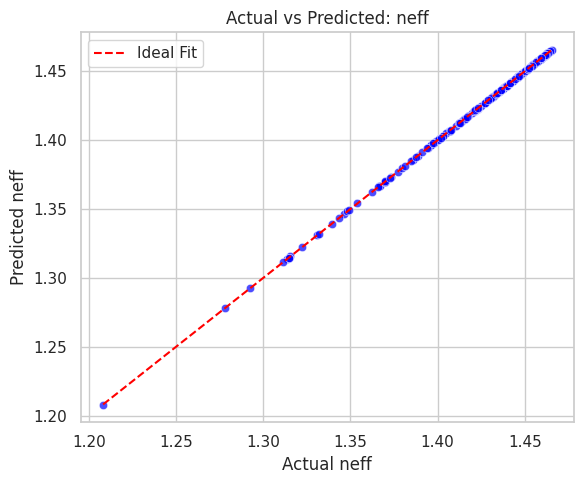

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Index for 'neff'
neff_index = output_columns.index("neff")

# Plot actual vs predicted for neff
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test[:, neff_index], y=y_pred[:, neff_index], color="blue", alpha=0.7)
plt.plot(
    [min(y_test[:, neff_index]), max(y_test[:, neff_index])],
    [min(y_test[:, neff_index]), max(y_test[:, neff_index])],
    color='red', linestyle='--', label='Ideal Fit'
)
plt.xlabel("Actual neff")
plt.ylabel("Predicted neff")
plt.title("Actual vs Predicted: neff")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Index of the 'neff' column
neff_index = output_columns.index("neff")

# Create DataFrame with actual and predicted neff
neff_comparison_df = pd.DataFrame({
    'Actual neff': y_test[:, neff_index],
    'Predicted neff': y_pred[:, neff_index]
})

# Show first 10 rows
neff_comparison_df.head(10)

,Actual neff,Predicted neff
0,1.42285,1.422856
1,1.43091,1.430921
2,1.42198,1.421983
3,1.42118,1.421177
4,1.45896,1.458971
5,1.45829,1.458264
6,1.43517,1.435180
7,1.46495,1.464940
8,1.45825,1.458250
9,1.40054,1.400536


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Extract actual and predicted values for neff
neff_index = output_columns.index("neff")
y_test_actual_neff = y_test[:, neff_index]
y_test_predicted_neff = y_pred[:, neff_index]

# Calculate metrics
mse = mean_squared_error(y_test_actual_neff, y_test_predicted_neff)
mape = mean_absolute_percentage_error(y_test_actual_neff, y_test_predicted_neff)
r2 = r2_score(y_test_actual_neff, y_test_predicted_neff)

# Print results
print("For Neff:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R² Score:", r2)


For Neff:
Mean Squared Error (MSE): 8.98788124311484e-10
Mean Absolute Percentage Error (MAPE): 1.0557648030094537e-05
R² Score: 0.9999994459490771


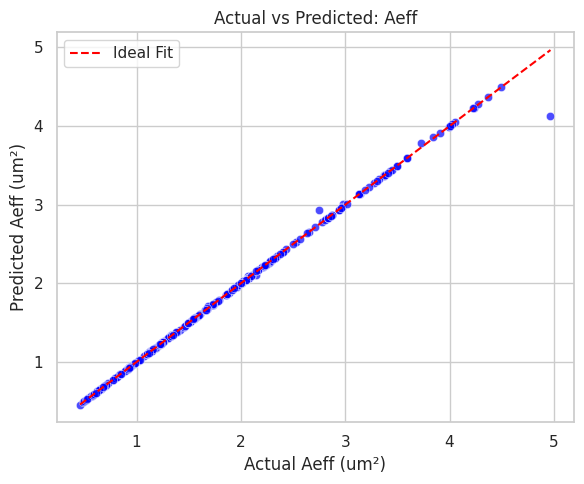

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Index for 'Aeff'
aeff_index = output_columns.index("Aeff\n(um^2)")

# Plot actual vs predicted for Aeff
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test[:, aeff_index], y=y_pred[:, aeff_index], color="blue", alpha=0.7)
plt.plot(
    [min(y_test[:, aeff_index]), max(y_test[:, aeff_index])],
    [min(y_test[:, aeff_index]), max(y_test[:, aeff_index])],
    color='red', linestyle='--', label='Ideal Fit'
)
plt.xlabel("Actual Aeff (um²)")
plt.ylabel("Predicted Aeff (um²)")
plt.title("Actual vs Predicted: Aeff")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Index for 'Aeff'
aeff_index = output_columns.index("Aeff\n(um^2)")

# Create DataFrame with actual and predicted neff
aeff_comparison_df = pd.DataFrame({
    'Actual aeff': y_test[:, aeff_index],
    'Predicted aeff': y_pred[:, aeff_index]
})

# Show first 10 rows
aeff_comparison_df.head(10)

,Actual aeff,Predicted aeff
0,0.458466,0.458376
1,4.234090,4.236484
2,1.411980,1.412223
3,0.706059,0.705929
4,1.723960,1.724466
5,2.265310,2.264908
6,2.207370,2.207665
7,4.007410,4.007433
8,4.275220,4.275327
9,3.911810,3.913818


In [ ]:

# Extract actual and predicted values for aeff
aeff_index = output_columns.index("Aeff\n(um^2)")
y_test_actual_aeff = y_test[:, aeff_index]
y_test_predicted_aeff = y_pred[:, aeff_index]

# Calculate metrics
mse = mean_squared_error(y_test_actual_aeff, y_test_predicted_aeff)
mape = mean_absolute_percentage_error(y_test_actual_aeff, y_test_predicted_aeff)
r2 = r2_score(y_test_actual_aeff, y_test_predicted_aeff)

# Print results
print("For Aeff:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R² Score:", r2)

For Aeff:
Mean Squared Error (MSE): 0.0032906724128248387
Mean Absolute Percentage Error (MAPE): 0.001843853832975294
R² Score: 0.996693690384539


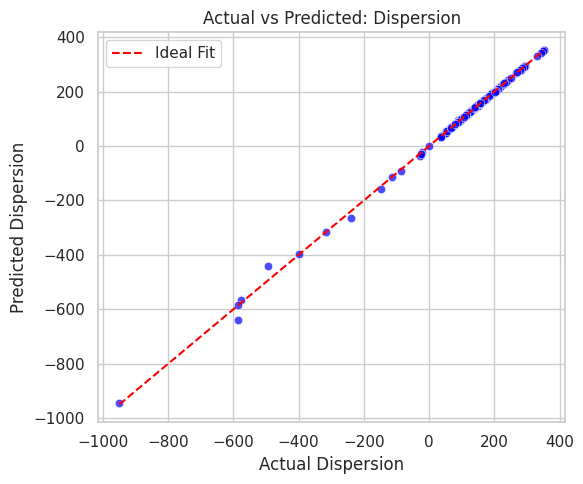

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Index for 'dispersion'
dispersion_index = output_columns.index("dispersion\n(ps/km.nm)")

# Plot actual vs predicted for dispersion
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test[:, dispersion_index], y=y_pred[:, dispersion_index], color="blue", alpha=0.7)
plt.plot(
    [min(y_test[:, dispersion_index]), max(y_test[:, dispersion_index])],
    [min(y_test[:, dispersion_index]), max(y_test[:, dispersion_index])],
    color='red', linestyle='--', label='Ideal Fit'
)
plt.xlabel("Actual Dispersion")
plt.ylabel("Predicted Dispersion")
plt.title("Actual vs Predicted: Dispersion")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Get index of dispersion column
dispersion_index = output_columns.index("dispersion\n(ps/km.nm)")

# Create a comparison DataFrame
dispersion_comparison_df = pd.DataFrame({
    'Actual dispersion (ps/km·nm)': y_test[:, dispersion_index],
    'Predicted dispersion (ps/km·nm)': y_pred[:, dispersion_index]
})

# Show first 10 rows
dispersion_comparison_df.head(10)

,Actual dispersion (ps/km·nm),Predicted dispersion (ps/km·nm)
0,352.0200,352.053112
1,81.6006,81.670326
2,204.1780,203.332715
3,228.3740,228.401889
4,113.2570,112.963456
5,101.0540,100.991591
6,152.7230,152.528178
7,54.8488,54.871725
8,71.8437,71.890402
9,105.8180,106.365393


In [ ]:
# Extract actual and predicted values
y_test_actual_disp = y_test[:, dispersion_index]
y_test_predicted_disp = y_pred[:, dispersion_index]

# Calculate metrics
mse_disp = mean_squared_error(y_test_actual_disp, y_test_predicted_disp)
mape_disp = mean_absolute_percentage_error(y_test_actual_disp, y_test_predicted_disp)
r2_disp = r2_score(y_test_actual_disp, y_test_predicted_disp)

# Print results
print("For Dispersion:")
print("Mean Squared Error (MSE):", mse_disp)
print("Mean Absolute Percentage Error (MAPE):", mape_disp)
print("R² Score:", r2_disp)

For Dispersion:
Mean Squared Error (MSE): 29.458227637895323
Mean Absolute Percentage Error (MAPE): 0.010638319117288084
R² Score: 0.9986708384753549


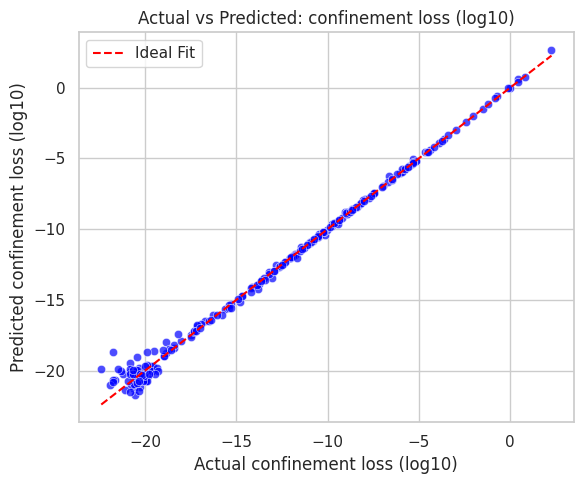

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Index for 'conf-loss-in-log10'
log_loss_index = output_columns.index("conf-loss-in-log10\n(dB/cm)")

# Plot actual vs predicted for conf-loss-in-log10
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=y_test[:, log_loss_index],
    y=y_pred[:, log_loss_index],
    color="blue",
    alpha=0.7
)
plt.plot(
    [min(y_test[:, log_loss_index]), max(y_test[:, log_loss_index])],
    [min(y_test[:, log_loss_index]), max(y_test[:, log_loss_index])],
    color='red', linestyle='--', label='Ideal Fit'
)
plt.xlabel("Actual confinement loss (log10)")
plt.ylabel("Predicted confinement loss (log10)")
plt.title("Actual vs Predicted: confinement loss (log10)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Get index of 'conf-loss-in-log10'
# log_loss_index = output_columns.index("conf-loss-in-log10")

# Create DataFrame with actual and predicted values
log_loss_comparison_df = pd.DataFrame({
    'Actual conf-loss-in-log10': y_test[:, log_loss_index],
    'Predicted conf-loss-in-log10': y_pred[:, log_loss_index]
})

# Show first 10 rows
log_loss_comparison_df.head(10)

,Actual conf-loss-in-log10,Predicted conf-loss-in-log10
0,-19.687321,-19.694846
1,-5.163552,-5.155605
2,-18.831497,-18.008012
3,-10.391590,-10.391452
4,-20.149192,-20.403777
5,-20.277590,-19.998269
6,-19.676884,-20.073764
7,-15.634085,-15.633340
8,-9.757963,-9.759545
9,-12.808432,-12.537162


In [ ]:

# Extract actual and predicted values
y_test_actual_log_loss = y_test[:, log_loss_index]
y_test_predicted_log_loss = y_pred[:, log_loss_index]

# Calculate metrics
mse_log = mean_squared_error(y_test_actual_log_loss, y_test_predicted_log_loss)
mape_log = mean_absolute_percentage_error(y_test_actual_log_loss, y_test_predicted_log_loss)
r2_log = r2_score(y_test_actual_log_loss, y_test_predicted_log_loss)

# Print results
print("For conf-loss-in-log10:")
print("Mean Squared Error (MSE):", mse_log)
print("Mean Absolute Percentage Error (MAPE):", mape_log)
print("R² Score:", r2_log)

For conf-loss-in-log10:
Mean Squared Error (MSE): 0.2170024945827008
Mean Absolute Percentage Error (MAPE): 0.02183792898383406
R² Score: 0.9942956927447172
